### Importing Packages

In [2]:
import numpy as np 
import pandas as pd
import os 
import cv2 as cv2
from matplotlib import pyplot as plt 
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam 

In [3]:
dataset = r"C:\Users\User\Downloads\Breast cancer\8864"
Yes_path = r"C:\Users\User\Downloads\Breast cancer\8864\1" # IDC
No_path = r"C:\Users\User\Downloads\Breast cancer\8864\0" # No IDC

### Checking Size of the image

(50, 50, 3)


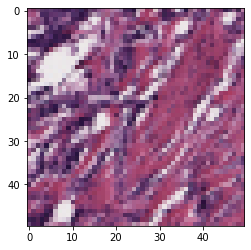

In [4]:
img = cv2.imread(Yes_path+'\8864_idx5_x1551_y2701_class1.png')
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

(50, 50, 3)


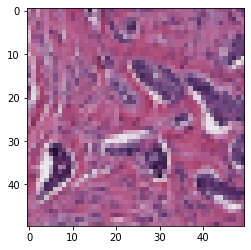

In [5]:
img = cv2.imread(Yes_path+'\8864_idx5_x1901_y2201_class1.png')
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
vals1 = [Yes_path, No_path]
print(os.listdir(vals1[0]).__len__()) # No. of images in 'yes' folder
print(os.listdir(vals1[1]).__len__()) # No. of images in 'no' folder

328
805


In [7]:
pathdir = [Yes_path, No_path]
classes = ['Yes', 'No']
filepaths = [] 
labels = [] 
for i, j in zip(pathdir, classes): 
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())

['8864_idx5_x1451_y2601_class1.png', '8864_idx5_x1451_y2651_class1.png', '8864_idx5_x1451_y2701_class1.png', '8864_idx5_x1451_y2751_class1.png', '8864_idx5_x1451_y2801_class1.png', '8864_idx5_x1501_y2551_class1.png', '8864_idx5_x1501_y2601_class1.png', '8864_idx5_x1501_y2651_class1.png', '8864_idx5_x1501_y2701_class1.png', '8864_idx5_x1501_y2751_class1.png', '8864_idx5_x1501_y2801_class1.png', '8864_idx5_x1551_y2401_class1.png', '8864_idx5_x1551_y2451_class1.png', '8864_idx5_x1551_y2501_class1.png', '8864_idx5_x1551_y2551_class1.png', '8864_idx5_x1551_y2601_class1.png', '8864_idx5_x1551_y2651_class1.png', '8864_idx5_x1551_y2701_class1.png', '8864_idx5_x1551_y2751_class1.png', '8864_idx5_x1551_y2801_class1.png', '8864_idx5_x1601_y2351_class1.png', '8864_idx5_x1601_y2401_class1.png', '8864_idx5_x1601_y2451_class1.png', '8864_idx5_x1601_y2501_class1.png', '8864_idx5_x1601_y2551_class1.png', '8864_idx5_x1601_y2601_class1.png', '8864_idx5_x1601_y2651_class1.png', '8864_idx5_x1601_y2701_clas

In [8]:
print(filepaths[0:4])
# printing the filepaths from index 0 to 4
print(labels[0:4])
# printing the labels from index 0 to 4

print(filepaths[-4:])
# printing last 4 filepaths
print(labels[-4:])
# printing last 4 labels


['C:\\Users\\User\\Downloads\\Breast cancer\\8864\\1\\8864_idx5_x1451_y2601_class1.png', 'C:\\Users\\User\\Downloads\\Breast cancer\\8864\\1\\8864_idx5_x1451_y2651_class1.png', 'C:\\Users\\User\\Downloads\\Breast cancer\\8864\\1\\8864_idx5_x1451_y2701_class1.png', 'C:\\Users\\User\\Downloads\\Breast cancer\\8864\\1\\8864_idx5_x1451_y2751_class1.png']
['Yes', 'Yes', 'Yes', 'Yes']
['C:\\Users\\User\\Downloads\\Breast cancer\\8864\\0\\8864_idx5_x951_y2401_class0.png', 'C:\\Users\\User\\Downloads\\Breast cancer\\8864\\0\\8864_idx5_x951_y2901_class0.png', 'C:\\Users\\User\\Downloads\\Breast cancer\\8864\\0\\8864_idx5_x951_y901_class0.png', 'C:\\Users\\User\\Downloads\\Breast cancer\\8864\\0\\8864_idx5_x951_y951_class0.png']
['No', 'No', 'No', 'No']


In [9]:
# By converting into data frame merging filepaths and labels
datazipping = list(zip(filepaths, labels))
pathframe = pd.DataFrame(datazipping, columns=['filepaths', 'labels'])

In [10]:
pathframe.head()

,filepaths,labels
0,C:\Users\User\Downloads\Breast cancer\8864\1\8...,Yes
1,C:\Users\User\Downloads\Breast cancer\8864\1\8...,Yes
2,C:\Users\User\Downloads\Breast cancer\8864\1\8...,Yes
3,C:\Users\User\Downloads\Breast cancer\8864\1\8...,Yes
4,C:\Users\User\Downloads\Breast cancer\8864\1\8...,Yes


In [11]:
pathframe.tail()

,filepaths,labels
1128,C:\Users\User\Downloads\Breast cancer\8864\0\8...,No
1129,C:\Users\User\Downloads\Breast cancer\8864\0\8...,No
1130,C:\Users\User\Downloads\Breast cancer\8864\0\8...,No
1131,C:\Users\User\Downloads\Breast cancer\8864\0\8...,No
1132,C:\Users\User\Downloads\Breast cancer\8864\0\8...,No


In [12]:
pathframe.__len__()

1133

In [13]:
# Giving us a count of the no. of 'yes' labels and the no. of 'no' labels in the dataset
print(pathframe['labels'].value_counts())

No     805
Yes    328
Name: labels, dtype: int64


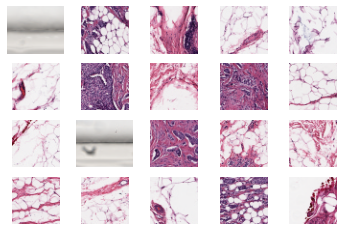

In [14]:
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(pathframe.filepaths[vals]), cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

### Training and Test dataset

In [14]:
# Splitting the dataset into train and test images
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=42)
# Splitting the data into train and test
Train_new, valid = train_test_split(Train, train_size = 0.90, random_state=42)
# Splitting the training data again into training data and validation data
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(1019, 2) (114, 2) (917, 2) (102, 2)


### Preprocessing dataset

In [15]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 40 , width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip = True, vertical_flip= True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [16]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col = 'filepaths', y_col='labels', batch_size=16, target_size=(200,200), class_mode = 'binary', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe = Test, x_col = 'filepaths', y_col='labels', batch_size=16, target_size=(200,200), class_mode = 'binary', shuffle=False)
valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col = 'filepaths', y_col='labels', batch_size=16, target_size=(200,200), class_mode = 'binary', shuffle=False)

Found 917 validated image filenames belonging to 2 classes.
Found 114 validated image filenames belonging to 2 classes.
Found 102 validated image filenames belonging to 2 classes.


In [17]:
print(train_gen.class_indices)

{'No': 0, 'Yes': 1}


{'No': 0, 'Yes': 1}
(16, 200, 200, 3)


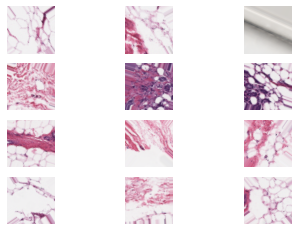

In [18]:
print(train_gen.class_indices)
print(train_gen[0][0].shape)

for i in range(0, 12):
    val = train_gen[0][0][i]
    plt.subplot(4,3,i+1)
    plt.imshow(val)
    plt.axis('off')
plt.show()

### Transfer Learning

In [19]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape= (200,200,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [20]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2, min_delta= 0.01)

In [21]:
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
history= model.fit(train_gen, validation_data= valid_gen, epochs=10, verbose=1)

Epoch 1/10
58/58 [==============================] - 1497s 26s/step - loss: 0.3880 - acc: 0.8702 - val_loss: 0.4340 - val_acc: 0.8431
Epoch 2/10
58/58 [==============================] - 1493s 26s/step - loss: 0.2124 - acc: 0.9193 - val_loss: 0.4072 - val_acc: 0.8431
Epoch 3/10
58/58 [==============================] - 1484s 26s/step - loss: 0.1598 - acc: 0.9433 - val_loss: 0.2921 - val_acc: 0.8529
Epoch 4/10
58/58 [==============================] - 1539s 27s/step - loss: 0.1895 - acc: 0.9357 - val_loss: 0.2399 - val_acc: 0.9020
Epoch 5/10
58/58 [==============================] - 661s 11s/step - loss: 0.1686 - acc: 0.9498 - val_loss: 0.3759 - val_acc: 0.8529
Epoch 6/10
58/58 [==============================] - 600s 10s/step - loss: 0.1409 - acc: 0.9509 - val_loss: 0.1644 - val_acc: 0.9216
Epoch 7/10
58/58 [==============================] - 643s 11s/step - loss: 0.1142 - acc: 0.9618 - val_loss: 0.1841 - val_acc: 0.9118
Epoch 8/10
58/58 [==============================] - 657s 11s/step - loss

In [22]:
model.evaluate(test_gen)

8/8 [==============================] - 19s 2s/step - loss: 0.1347 - acc: 0.9649


[0.13470070858602412, 0.9649123]

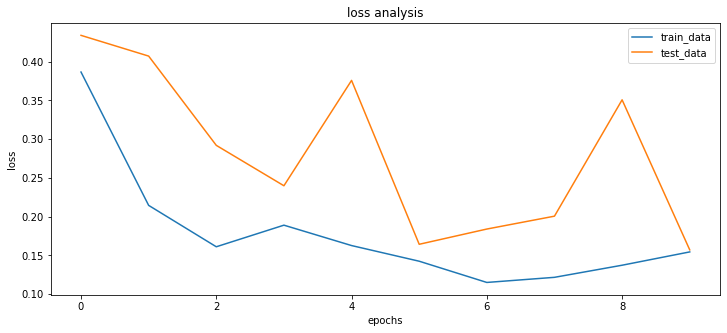

In [23]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','test_data'])
plt.title('loss analysis')
plt.show()

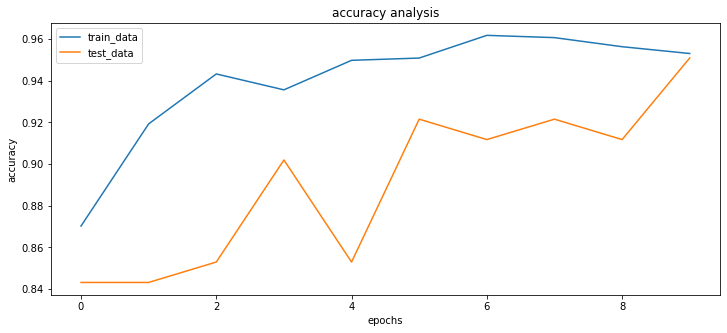

In [26]:
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('accuracy analysis')
plt.show()